In this notebook we are going to see how we can implement PCA using python.

The following notebook will use around 4 libraries which are just the bread and butter of data science.

The following notebook will not explicitly teah how to use these libraries rather it teaches you when and why use these libraries, you can follow the documentation of these or maybe watch a short youtube video about these libraries.

Learning how to use these libraries is fairly easy and learning them would not take much time, knowing when and why use these libraries is the main deal, and this notebook is designed with the aim to teach you that.

In [1]:
%pip install numpy
%pip install pandas
%pip install seaborn
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import warnings
warnings.filterwarnings('ignore')

The dataset we are going to use here is the abalone dataset from ULI.

Basically the dataset contains many physical measurements of different abalones and our target here is to predict the age of the abalones using these measurements, how we can do that is predict the number of rings in the abalone the +1.5 is the age in years.

So lets first dowload the dataset.

In [4]:
dp=pd.read_csv('https://raw.githubusercontent.com/harshit5674/DATA-MINING/main/datasets/abalone.csv')

In [5]:
dp

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [6]:
dp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [7]:
dp.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


You can see that the minimum height is 0, whatever the reason maybe for that, these datapoints would not be much useful for us, so we will just remove that 0 height datapoints.

In [8]:
dp[dp.Height == 0]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
1257,I,0.430,0.34,0.0,0.428,0.2065,0.0860,0.1150,8
3996,I,0.315,0.23,0.0,0.134,0.0575,0.0285,0.3505,6


As we can see that there are two datapoints for Height==0

In [9]:
dp = dp[dp.Height > 0]

In [10]:
dp.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4175.000000,4175.00000,4175.000000,4175.000000,4175.000000,4175.000000,4175.000000,4175.000000
mean,0.524065,0.40794,0.139583,0.829005,0.359476,0.180653,0.238834,9.935090
std,0.120069,0.09922,0.041725,0.490349,0.221954,0.109605,0.139212,3.224227
min,0.075000,0.05500,0.010000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.35000,0.115000,0.442250,0.186250,0.093500,0.130000,8.000000
50%,0.545000,0.42500,0.140000,0.800000,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.48000,0.165000,1.153500,0.502000,0.253000,0.328750,11.000000
max,0.815000,0.65000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


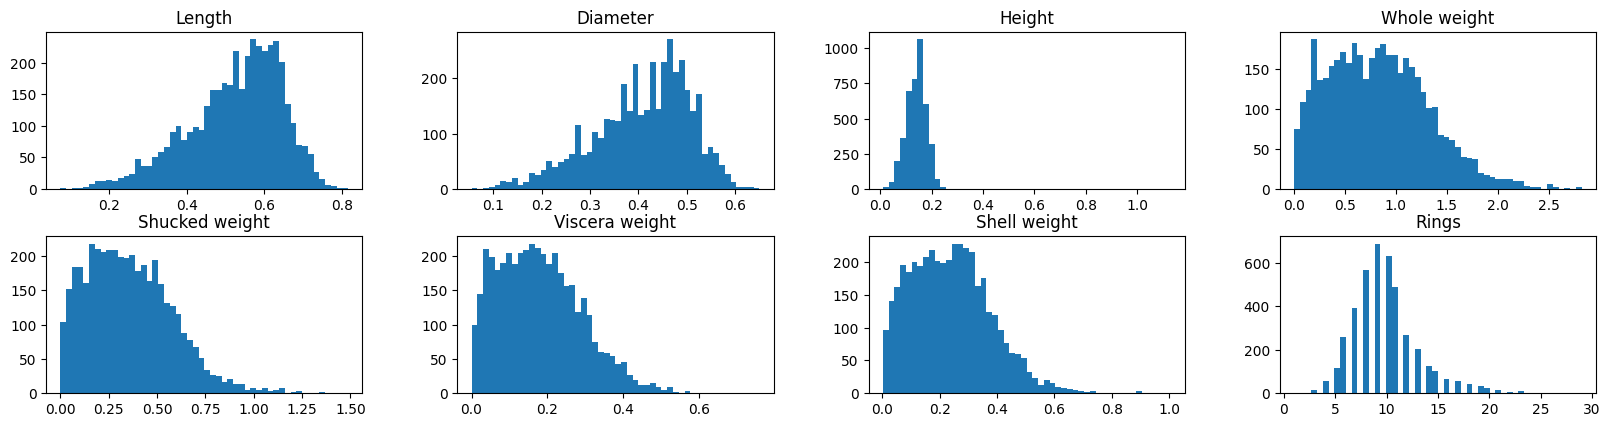

In [11]:
dp.hist(figsize=(20,10), grid = False, layout=(4,4), bins = 50);

We can see that the most skewed is the Height plot, here we define skewness as the measure of deviation from the normal(guassian) distribution.This maybe due to presence of some outliers.


You can also notice that Shucked weight, Whole weight, Shell weight seem to have similar distributions or in other words seem to have high correlation, which we will see after PCA is indeed the case.

Same is the case with Diameter and Length.

A better visualization of these correlations would be through scatter plots.

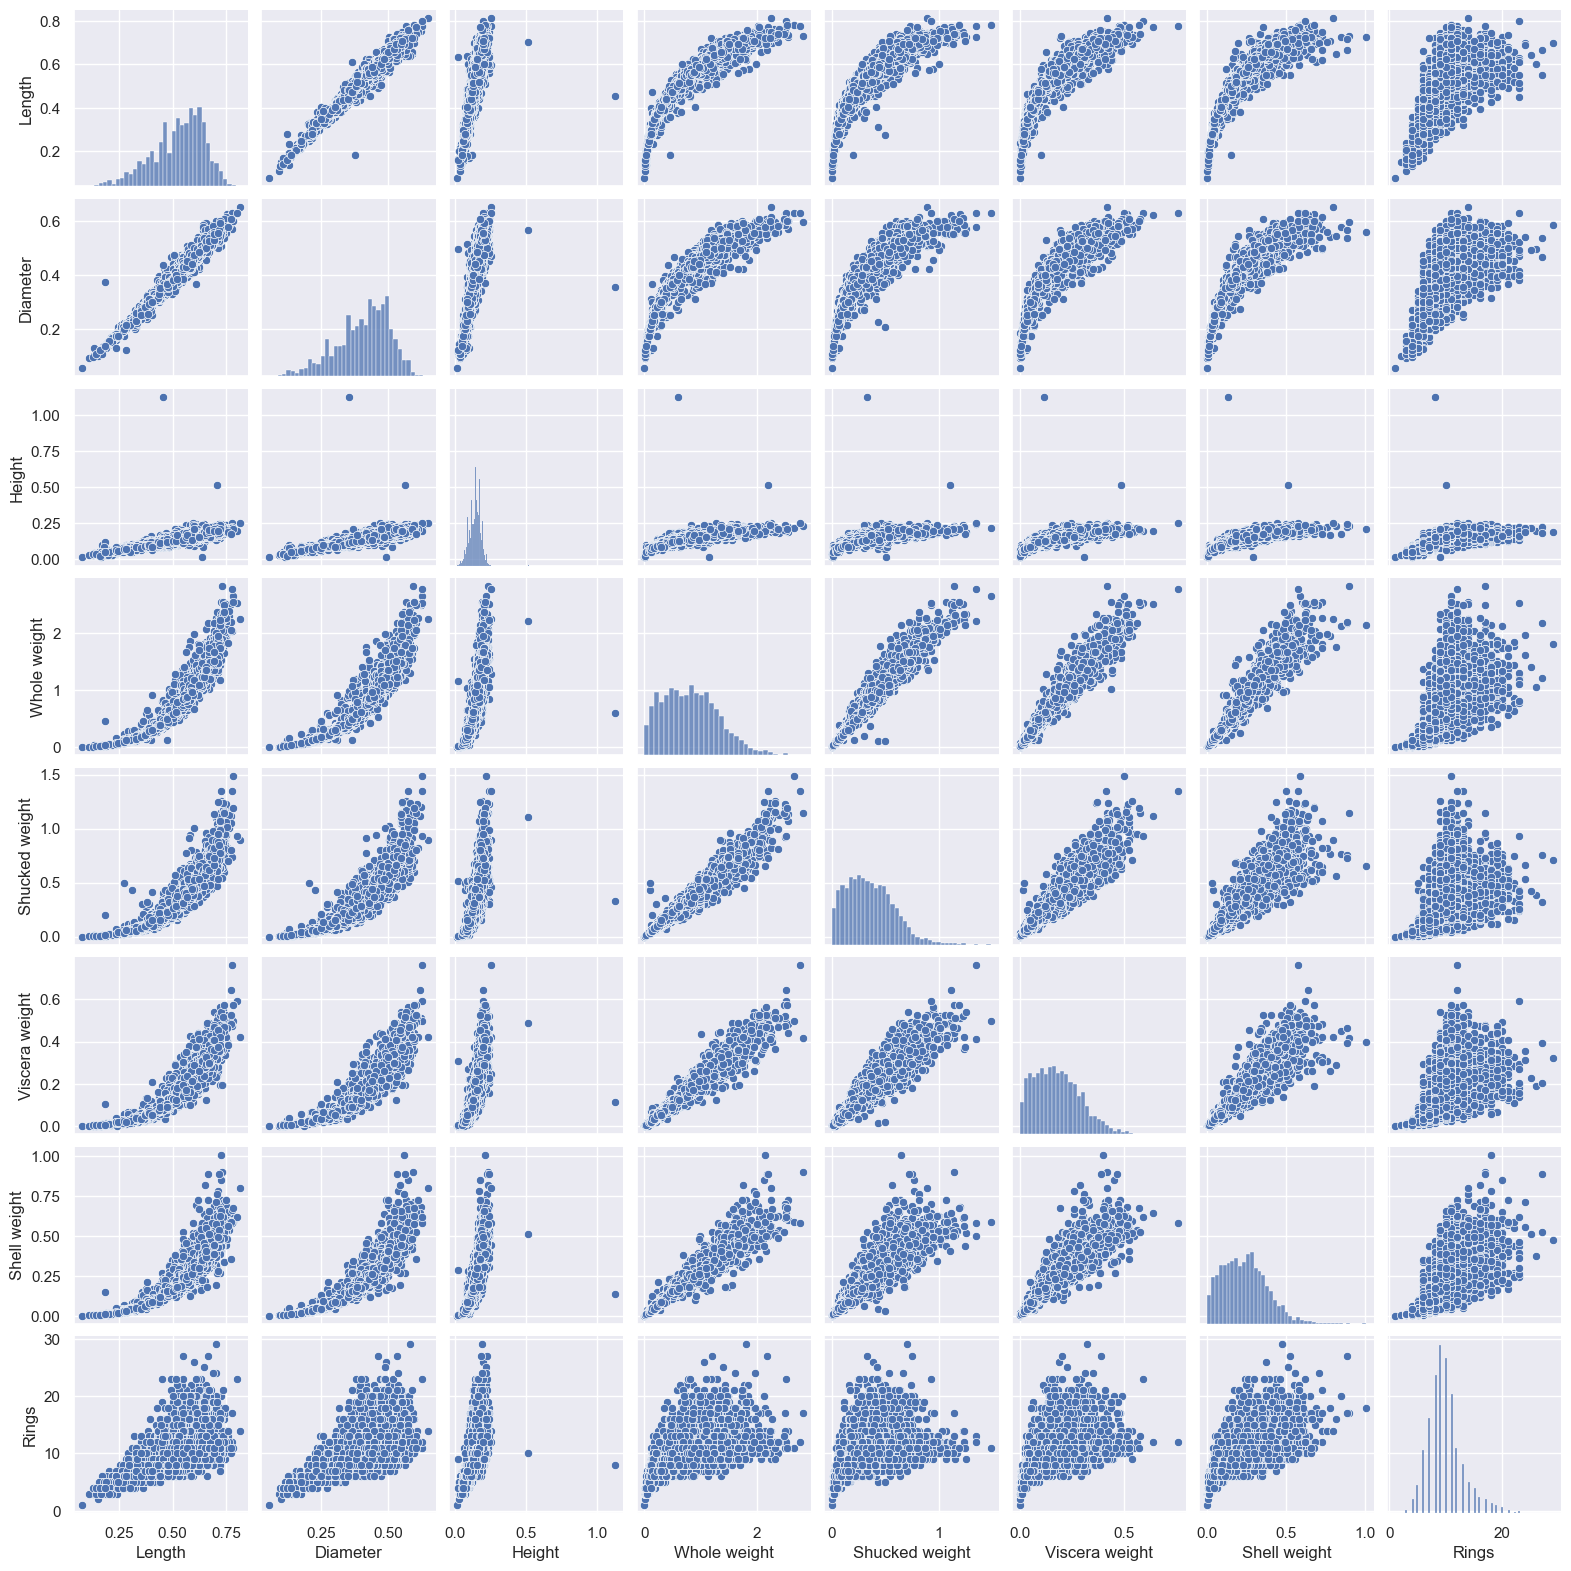

In [12]:
sns.set()
cols = ['Length','Diameter','Height','Whole weight', 'Shucked weight','Viscera weight', 'Shell weight','Rings']
sns.pairplot(dp[cols], height = 2)
plt.show();

With the above plots you can confirm that above stated observations, also try to find more intersting correlations in the above plots.

Data analysis is the thing data scientists spend most of their time on, so as an aspiring data scientist you should really try to find intersting patterns in the dataset.

An observation stated earlier about skewness of the Height was that the high skewness may be due to presence of outliers, if you look closely at the above plots maybe you can point out that the observation is correct.

Lets ZOOM IN!!

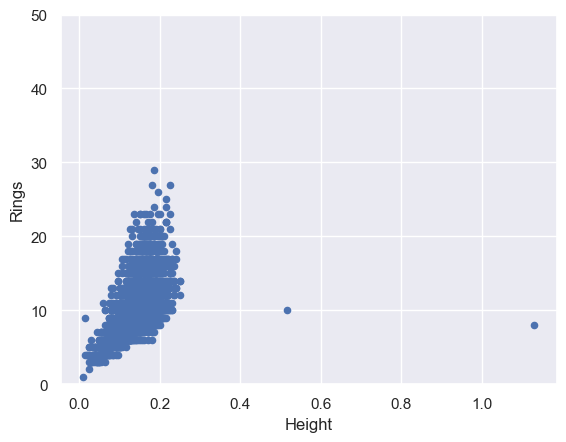

In [13]:
dd = pd.concat([dp['Rings'], dp['Height']], axis = 1)
dd.plot.scatter(x='Height', y='Rings', ylim=(0,50));

Now its much easy to see that their are indeed two outliers.

Lets remove them.

An easy way to remove them would be just the statement below.

In [14]:
dp = dp[dp.Height < 0.4]

Now lets make the above plot again.

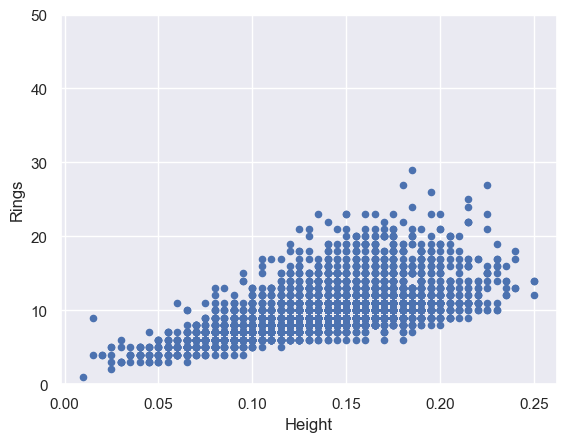

In [15]:
dd = pd.concat([dp['Rings'], dp['Height']], axis = 1)
dd.plot.scatter(x='Height', y='Rings', ylim=(0,50));

Now lets plot the histogram plot again.

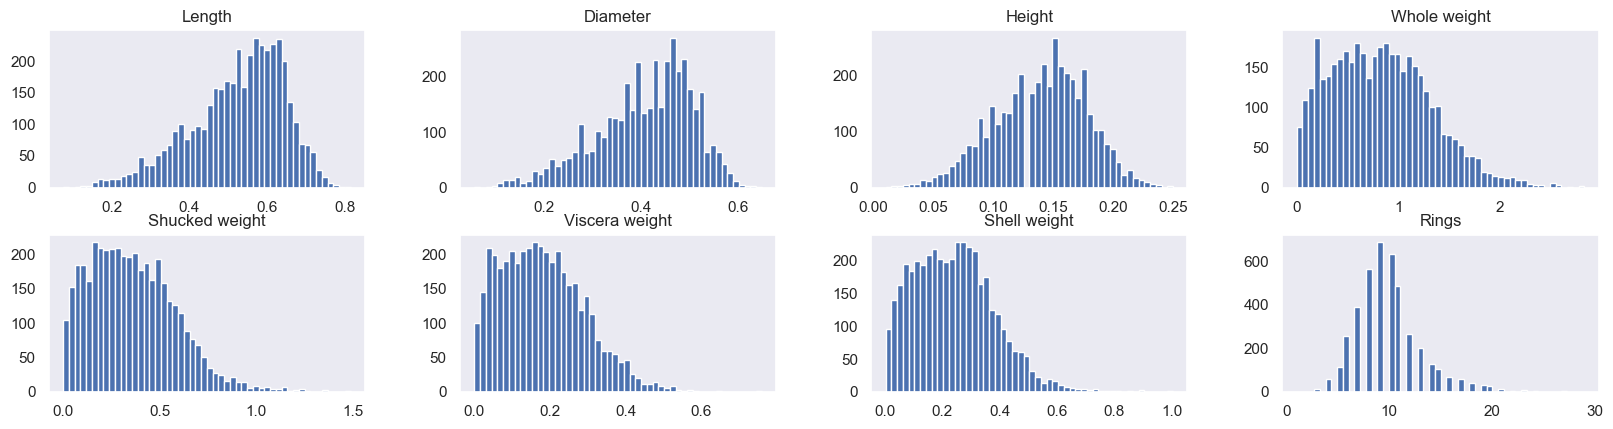

In [16]:
dp.hist(figsize=(20,10), grid = False, layout=(4,4), bins = 50);

You can see that Height now is very less skewed, so the reason really was outliers.

You may be thinking why less skewed or gaussian distributions are desirable, well the simplied version of the reason is that it makes the math and learning of these datasets easier.

There maybe more things you can observe or remove, this isnt an exhaustive list of things you can do and you are also encouraged to try performing more analysis of your own.

Okay so now lets jump into the main topic of the discussion PCA.

We will now import arguably the most used library when it comes to Machine Learning and Data Mining.

scikit-learn

But before importing that let's create a new dataframe which excludes the target varibale 'Rings'

In [17]:
X=dp.drop(['Rings'],axis=1)

In [18]:
X.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


And now lets standardize our dataset, since its very important to standardize our dataset before performing a PCA or it may give us false results.

In [19]:
X = (X - X.mean(axis=0)) / X.std(axis=0)

Now let's import our PCA function from scikit-learn

In [20]:
%pip install scikit-learn
from sklearn.decomposition import PCA

Note: you may need to restart the kernel to use updated packages.


PCA is only suitable for continous features, we will remove the categorical varibale 'Sex' before performing the PCA.

While you may argue that we can argue we can convert the sex to binary labels.

But PCA is designed for continuous variables. It tries to minimize variance (=squared deviations). The concept of squared deviations breaks down when you have binary variables.

In [21]:
X=X.drop(['Sex'],axis=1)

In [22]:
pca = PCA()
pca.fit_transform(X)

array([[-1.79888977e+00,  1.84039774e-01, -3.86286717e-01, ...,
         4.79130601e-03,  1.10764480e-01, -1.79246349e-02],
       [-3.40037914e+00,  2.26208043e-01,  1.51418160e-01, ...,
         2.40996737e-02,  6.39390711e-03,  3.35534307e-03],
       [-4.82093853e-01, -4.58416955e-01, -1.91198780e-01, ...,
        -5.89179306e-02,  4.56847683e-02, -4.52323400e-02],
       ...,
       [ 2.23944524e+00, -4.14953218e-01,  4.33149754e-01, ...,
        -7.65300385e-02,  3.05028535e-02,  2.25644757e-02],
       [ 1.65142159e+00,  1.45946379e-01, -4.72619054e-01, ...,
        -9.57706261e-02, -2.21232622e-02,  9.50885815e-02],
       [ 4.93314367e+00,  9.24872376e-01,  1.08732894e-02, ...,
         5.45014559e-01, -3.29992479e-02, -4.12607207e-02]])

The entire scikit-learn revolves around fit,transform and predict.

You can read about them in their documentations.

One more intersting read that is recommended is "https://arxiv.org/pdf/1309.0238.pdf". This paper will show you the beauty of the implementation of this wonderful library.

In [23]:
pca.get_covariance()

array([[1.        , 0.90718656, 0.98679387, 0.90602556, 0.89333034,
        0.89971558, 0.92549943],
       [0.90718656, 1.        , 0.90086804, 0.89185749, 0.83748526,
        0.86675679, 0.88884956],
       [0.98679387, 0.90086804, 1.        , 0.89836261, 0.89812943,
        0.90303291, 0.92532775],
       [0.90602556, 0.89185749, 0.89836261, 1.        , 0.88319395,
        0.90813293, 0.95595436],
       [0.89333034, 0.83748526, 0.89812943, 0.88319395, 1.        ,
        0.93183138, 0.96936977],
       [0.89971558, 0.86675679, 0.90303291, 0.90813293, 0.93183138,
        1.        , 0.96628962],
       [0.92549943, 0.88884956, 0.92532775, 0.95595436, 0.96936977,
        0.96628962, 1.        ]])

In [24]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([0.92445366, 0.03059499, 0.01984547, 0.01321074, 0.00914006,
       0.00181739, 0.00093769])

In [25]:
cumulative_variance_explained = np.cumsum(explained_variance)
cumulative_variance_explained

array([0.92445366, 0.95504865, 0.97489412, 0.98810486, 0.99724492,
       0.99906231, 1.        ])

Okay so a lot happened in the above 2 or 3 statements, lets analyse each of the statement one by one.

What explained_variance does is give us the amount of variance explained by each of the selected components.

Which is nothing but Equal to n_components largest eigenvalues of the covariance matrix of X.

And explained_variance_ratio_ just gives us the Percentage of variance explained by each of the selected components.

And get_covarince just gives the covariance of the data.

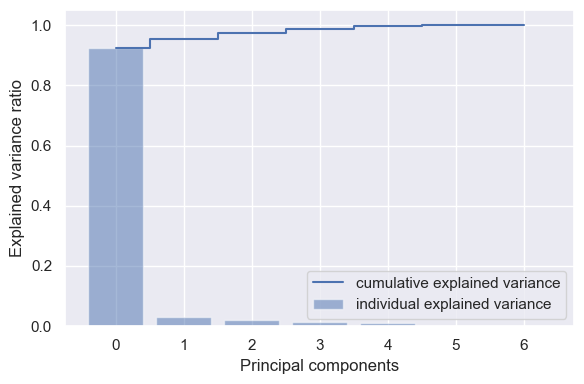

In [26]:
plt.figure(figsize=(6, 4))

plt.step(range(7), cumulative_variance_explained, where='mid',
             label='cumulative explained variance')
plt.bar(range(7), explained_variance, alpha=0.5, align='center',
        
        label='individual explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()

And the above plot gives it all.

We see that the first two principal components can explain over 95.5% of the variation of the feature variables. We may project the original features from the 7-dimensional space to a 2-dimensional space.

So with an additional 'Sex' feature We can see that We may project the original features from the 8-dimensional space to a 3-dimensional space.


I hope now that after seeing all these visualizations you are able to appreciate just how powerful PCA is.